# Exercise 7
## Machine Learning, Linear/logistic regression

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Data

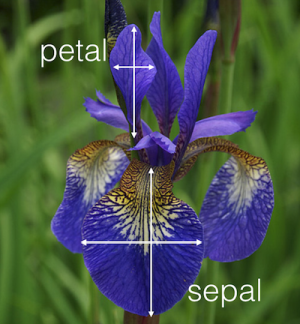

(Source: https://kedro.readthedocs.io/en/0.17.5/02_get_started/05_example_project.html)

In [8]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
target_names = iris['target_names']
target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Regression

In [12]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
iris = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris['target_names'] = iris.apply(lambda row: target_names[int(row.target)], axis=1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


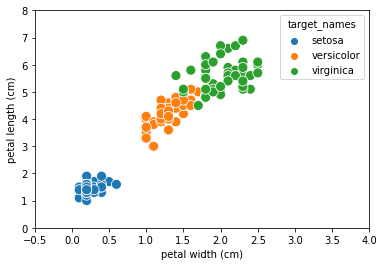

In [14]:
sns.scatterplot(data=iris, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([-0.5, 4])
plt.show()

### Fitting a function

In [15]:
def linearFunction(x, m, b):
    return m * x + b

In [16]:
x = np.arange(-1, 5.0, 0.1)

@interact(m=(-5.0, 5.0, 0.1), b=(0, 2.0, 0.1))
def plot_linear_line(m=0, b=0):
    
    line = linearFunction(x,m,b)  # Creating a line using your function and the values given

    plt.plot(x, line, '--', color='magenta', linewidth=3)
    sns.scatterplot(data=iris, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
    plt.ylim([0, 8])
    plt.xlim([-0.5, 4])

interactive(children=(FloatSlider(value=0.0, description='m', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

In [17]:
def quadratic_function(x, a, b, c):
    return a * (x*x) + b*x + c

In [18]:
x = np.arange(-5, 5.0, 0.1)

@interact(a=(-1, 6.0, 0.1), b=(-3.0, 4.0, 0.1), c=(0, 2.0, 0.1))
def plot_parabola(a=0, b=0, c=0):
    
    parabola = quadratic_function(x, a, b, c)  # Creating a line using your function and the values given

    plt.plot(x, parabola, '--', color='magenta', linewidth=3)
    sns.scatterplot(data=iris, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
    plt.ylim([-5, 15])
    plt.xlim([-5, 5])

interactive(children=(FloatSlider(value=0.0, description='a', max=6.0, min=-1.0), FloatSlider(value=0.0, descr…

In [19]:
def exponential_function(x, a, b):
    return a * (b**x)

In [20]:
x = np.arange(-10, 5.0, 0.1)

@interact(a=(0, 6.0, 0.1), b=(1.0, 4.0, 0.1))
def plot_exp_func(a=0, b=1):
    
    exp_func = exponential_function(x, a, b)  # Creating a line using your function and the values given

    plt.plot(x, exp_func, '--', color='magenta', linewidth=3)
    sns.scatterplot(data=iris, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
    plt.ylim([-5, 15])
    plt.xlim([-5, 5])

interactive(children=(FloatSlider(value=0.0, description='a', max=6.0), FloatSlider(value=1.0, description='b'…

### Minimze

In [21]:
from scipy.optimize import minimize

What should/can we minimize? 

In [22]:
def helper(values, x, y):
    # minimize the mean-squared error (MSE)
    return ((y-quadratic_function(x, *values))**2).sum()

In [23]:
# prepare features
X = np.asarray(iris['petal width (cm)'])
y = iris['petal length (cm)']

In [24]:
m = minimize(helper, [1, 1, 1], args=(X, y))  #[1, 1, 1, 1] represents the initial guess!
m

      fun: 24.752382126831613
 hess_inv: array([[ 0.01531276, -0.03554442,  0.01176622],
       [-0.03554442,  0.08828237, -0.03423904],
       [ 0.01176622, -0.03423904,  0.02068215]])
      jac: array([7.15255737e-07, 2.38418579e-07, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([-0.52769194,  3.45483379,  0.67808336])

(-5.0, 5.0)

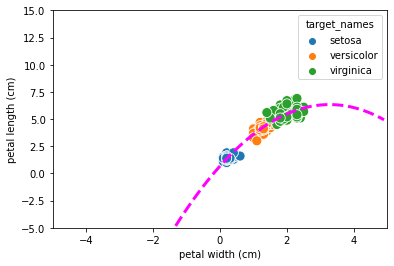

In [25]:
x = np.arange(-5, 5.0, 0.1)
y_fit = quadratic_function(x, *m.x)

plt.plot(x, y_fit, '--', color='magenta', linewidth=3)
sns.scatterplot(data=iris, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([-5, 15])
plt.xlim([-5, 5])

### Curve fitting

[1.81276258 1.72875498]


(-5.0, 5.0)

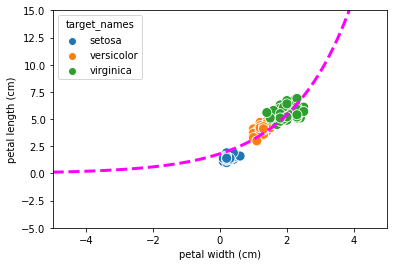

In [17]:
from scipy.optimize import curve_fit

values = curve_fit(exponential_function, X, y)[0] 
print(values)

x = np.arange(-5, 5.0, 0.1)
y_fit = exponential_function(x, *values)

plt.plot(x, y_fit, '--', color='magenta', linewidth=3)
sns.scatterplot(data=iris, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([-5, 15])
plt.xlim([-5, 5])

### LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# perform Linear Regression
reg = LinearRegression()
reg.fit(X.reshape((-1, 1)), y)

LinearRegression()

In [20]:
print('Intercept b:', reg.intercept_)
print('\nSlope m:', reg.coef_)

Intercept b: 1.0835580328505112

Slope m: [2.2299405]


(-0.5, 4.0)

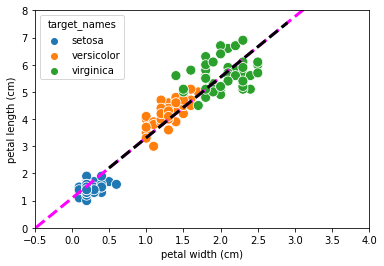

In [21]:
# Plot predicted line
x = np.arange(-1, 5.0, 0.1)
line = linearFunction(x, reg.coef_, reg.intercept_)
plt.plot(x, line, '--', color='magenta', linewidth=3)

# or just predict some y values
x = np.arange(0.5, 3.0, 0.1)
line_pred = reg.predict(x.reshape((-1, 1))) 
plt.plot(x, line_pred, '--', color='black', linewidth=3)
sns.scatterplot(data=iris, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([-0.5, 4])

## Classification

Load different data features

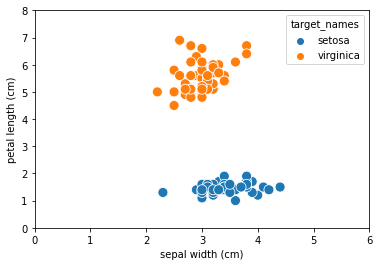

In [9]:
iris = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris['target_names'] = iris.apply(lambda row: target_names[int(row.target)], axis=1)

iris = iris[(iris['target_names'] == target_names[0]) | (iris['target_names'] == target_names[2])]
iris.loc[iris['target'] == 0.0, 'target'] = -1
iris.loc[iris['target'] == 2.0, 'target'] = 1
iris.reset_index()

sns.scatterplot(data=iris, x='sepal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([0, 6])
plt.show()

In [7]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap

In [10]:
# preparte features for classification
X, y = np.c_[iris['sepal width (cm)'], iris['petal length (cm)']], iris.target

### kNN (k-Nearest-Neighbors)

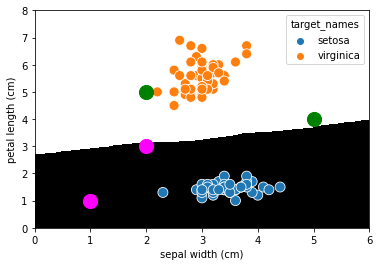

In [25]:
n_neighbors = 3
weights = ['uniform', 'distance']
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights[1])
kNN.fit(X, y)

xx, yy = np.meshgrid(np.arange(0, 8, 0.02),
                     np.arange(0, 6, 0.02))
Z = kNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='gray')

# Plot also the training points
sns.scatterplot(data=iris, x='sepal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([0, 6])

# test some points
test_points = [[1, 1], [2, 5], [2, 3], [5, 4]]
preds = kNN.predict(test_points)

for test_p, pred in zip(test_points, preds):
    plt.scatter(*test_p, color='green' if pred == 1 else 'magenta', s=200)

plt.show()

### SVM
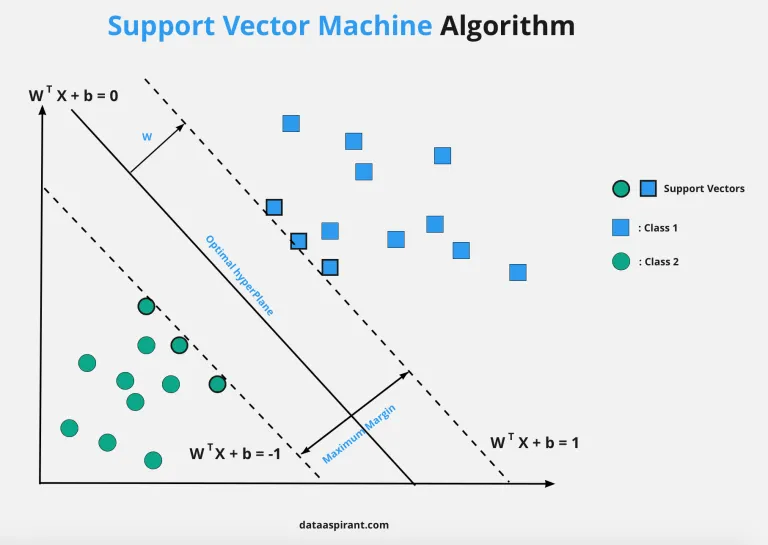
(https://i1.wp.com/dataaspirant.com/wp-content/uploads/2020/12/3-Support-Vector-Machine-Algorithm.png?resize=768%2C545&ssl=1)

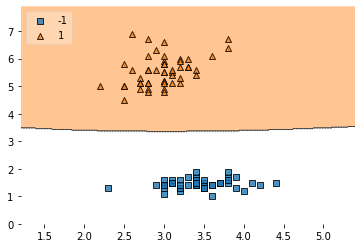

In [26]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

svm = SVC(kernel='poly', degree=2)
svm.fit(X, y)

plot_decision_regions(X, np.asarray(y, dtype='int'), clf=svm, legend=2)
plt.show()

### K-Means (unsupervised)
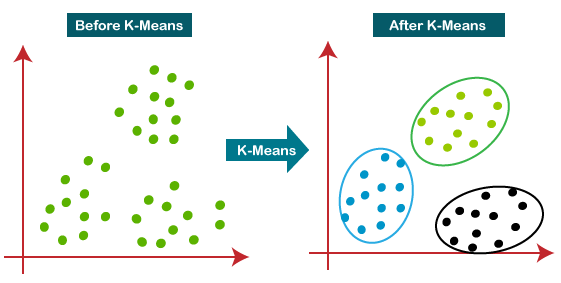
(https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

C:\Users\Rene Groh\anaconda3\envs\dsss_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


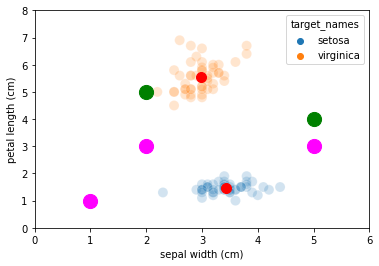

In [27]:
# KMeans --> unsupervised
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
sns.scatterplot(data=iris, x='sepal width (cm)', y='petal length (cm)', hue='target_names', s=100, alpha=0.2)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

plt.ylim([0, 8])
plt.xlim([0, 6])

# test some points
test_points = [[1, 1], [2, 5], [2, 3], [5, 4], [5, 3]]
preds = kmeans.predict(test_points)

for test_p, pred in zip(test_points, preds):
    plt.scatter(*test_p, color='green' if pred == 1 else 'magenta', s=200)

### Adaline
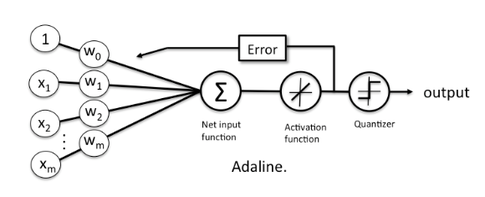
(http://rasbt.github.io/mlxtend/user_guide/classifier/Adaline_files/adaline_schematic.png)

#### Gradient Descent
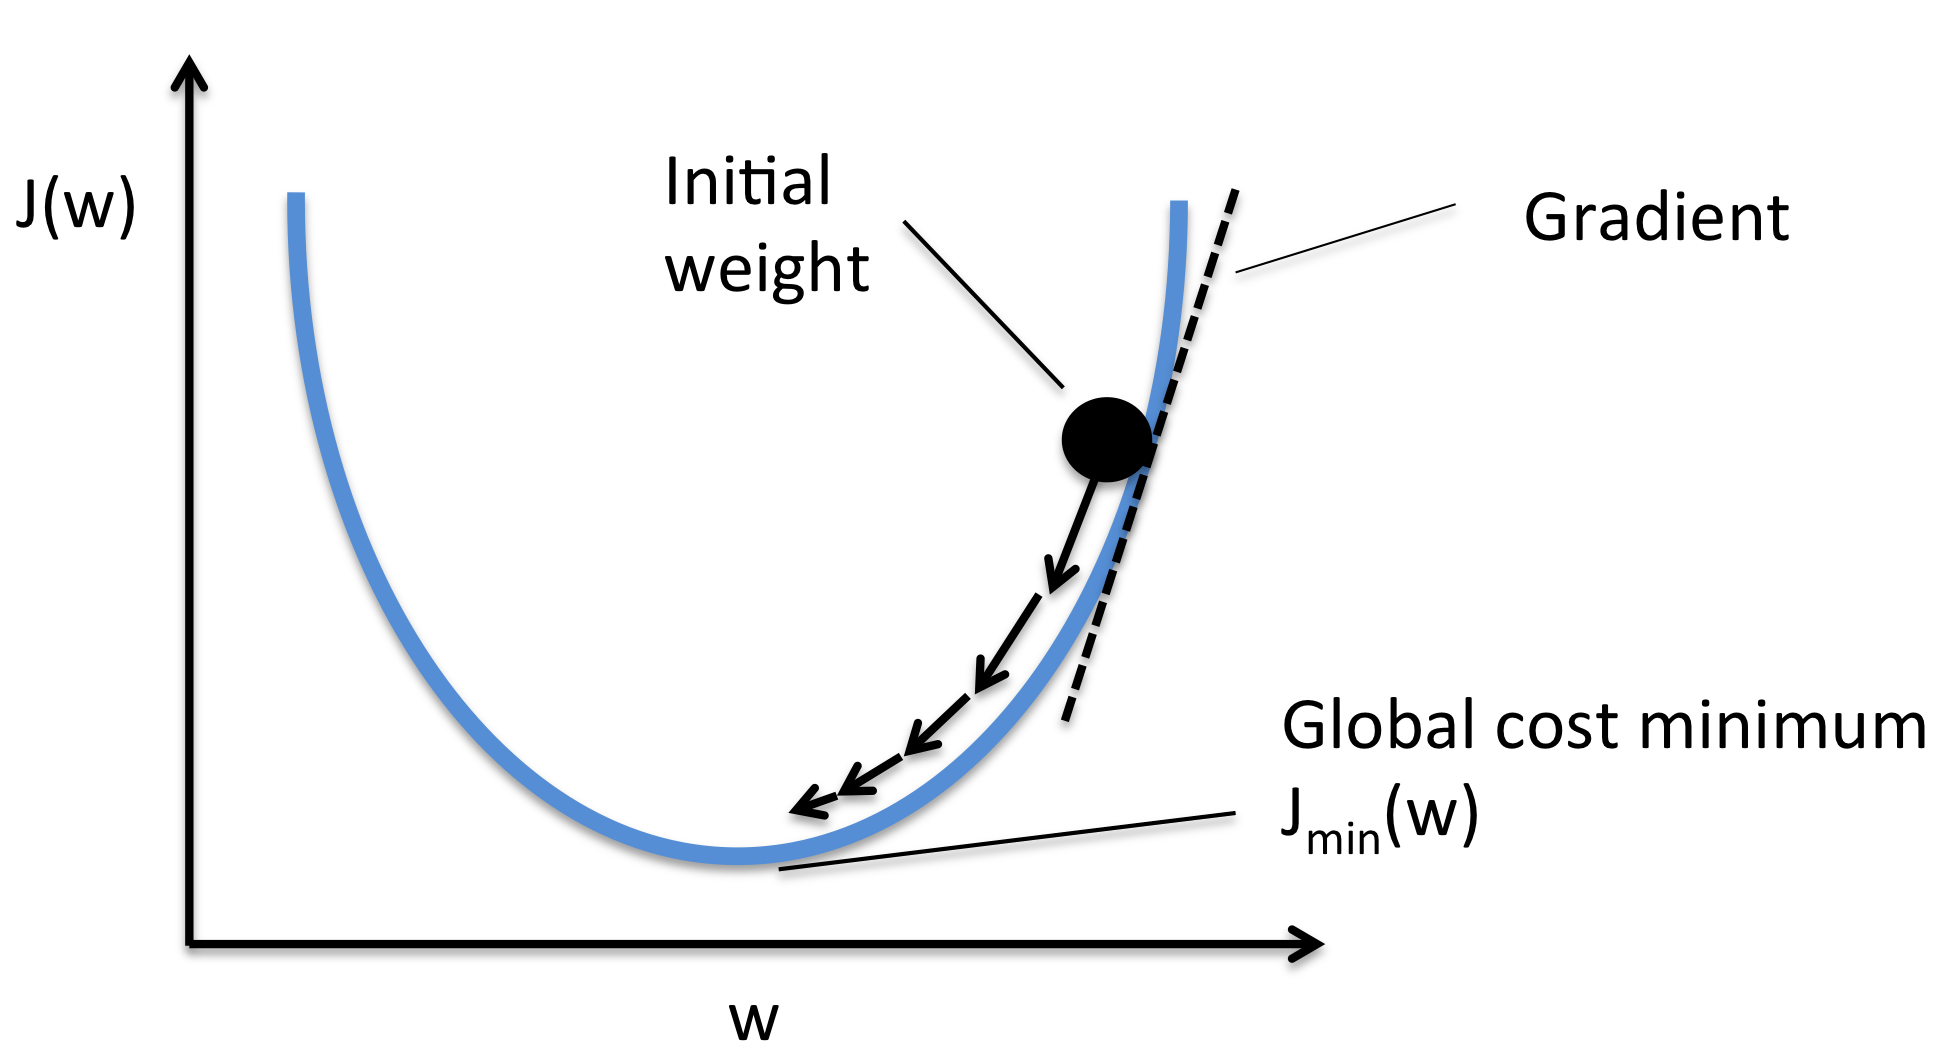
(https://sebastianraschka.com/images/faq/gradient-optimization/ball.png)

In [11]:
# code taken from: https://falksangdata.no/wp-content/uploads/2022/07/python-machine-learning-and-deep-learning-with-python-scikit-learn-and-tensorflow-2.pdf
class AdalineGD(object):
    """ADAptive LInear NEuron classifier."""
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data. """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            if i % 10 == 0:
                self.plot_decision_boundary()
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    def plot_decision_boundary(self):
        c = -self.w_[0]/self.w_[2]
        m = -self.w_[1]/self.w_[2]
        
        _x = np.arange(0,10)
        _y = linearFunction(_x, m, c)
        plt.plot(_x, _y, 'k', ls='--')

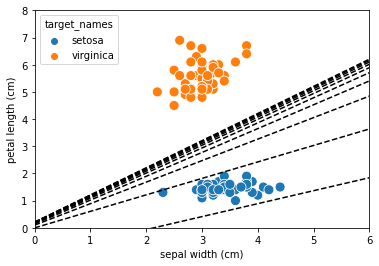

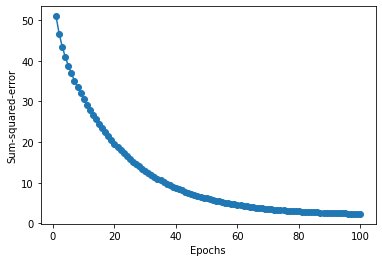

In [14]:
ada1 = AdalineGD(n_iter=100, eta=0.0001).fit(X, y)

sns.scatterplot(data=iris, x='sepal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([0, 6])

# test some points
#test_points = [[1, 1], [2, 5], [2, 3], [5, 4]]
#preds = ada1.predict(test_points)

#for test_p, pred in zip(test_points, preds):
    #plt.scatter(*test_p, color='green' if pred == 1 else 'magenta', s=200)

plt.show()

plt.plot(np.arange(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.show()

### Logistic Regression
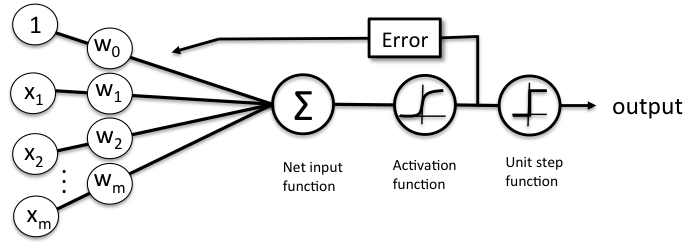
(https://sebastianraschka.com/images/faq/logistic_regression_linear/2.png)

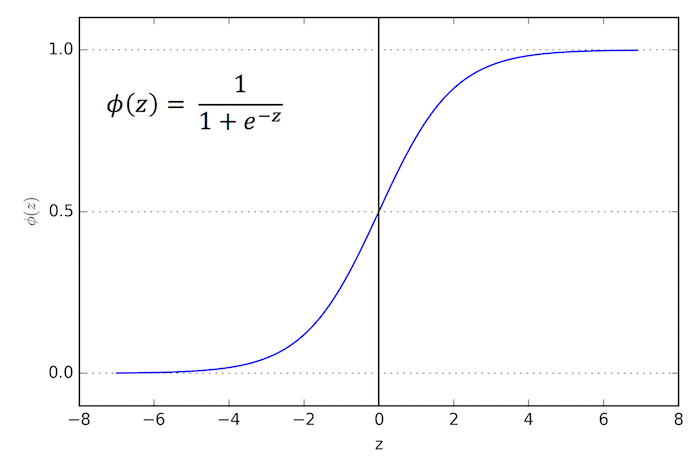
(https://sebastianraschka.com/images/faq/logistic_regression_linear/1.png)

In [30]:
from sklearn.linear_model import LogisticRegression

# perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

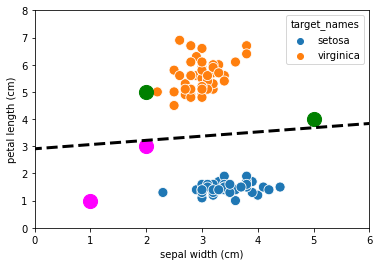

In [31]:
sns.scatterplot(data=iris, x='sepal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([0, 6])

# plot line

# Retrieve the model parameters.
b = log_reg.intercept_[0]
w1, w2 = log_reg.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

x = np.arange(-1, 8.0, 0.1)
line = linearFunction(x, m, c)
plt.plot(x, line, '--', color='black', linewidth=3)

# test some points
test_points = [[1, 1], [2, 5], [2, 3], [5, 4]]
preds = log_reg.predict(test_points)

for test_p, pred in zip(test_points, preds):
    plt.scatter(*test_p, color='green' if pred == 1 else 'magenta', s=200)

In [32]:
test_points = [[1, 1], [2, 5], [2, 3], [5, 4]]
preds = log_reg.predict(test_points)

In [33]:
preds

array([-1.,  1., -1.,  1.])